# Интеллектуальный анализ данных – весна 2025

# Домашнее задание 7: Деревья. Случайный лес

Правила:

- Домашнее задание оценивается в 10 баллов.


- Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.


- Можно использовать любые свободные источники с обязательным указанием ссылки на них.


- Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

<!-- ![](meme.jpg) -->
<img src="meme.jpg" alt="Drawing" style="width: 700px;"/>

## Часть 1: Основы построения решающие дерева (1.5 балла)

В этой части все расчёты необходимо реализовывать в виде запрограммированных формул, например, на `numpy`. **Нельзя использовать готовые реализации**. Например, если в задании требуется рассчитать энтропию, то требуется в каком-то виде релизовать расчёт по формуле, но нельзя использовать готовую реализацию `some_module.entropy()`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Задание 1.1 (0.5 балла)** Пусть известно, что в вершину решающего дерева попали 10 объектов, 8 из которых имеют метку класса $k_1$, а 2 имеют метку класса $k_2$. Рассчитайте энтропию такого распределения классов (с натуральным логарифмом). Ответ округлите до двух знаков после запятой.

In [2]:
def entropy(probabilities: list) -> float:
    if sum(probabilities) != 1:
        raise ValueError('Probabilities must sum to 1.')
    return -sum(p * np.log(p) for p in probabilities)

"%.2f" % round(entropy([0.8, 0.2]),2)

'0.50'

**Задание 1.2 (0.5 балла)** Пусть дополнительно известно, что вершина из предыдущего задания не является листовой и возможно такое разбиение, что в левое поддерево попадут все объекты класса $k_1$, а в правое - класса $k_2$. Посчитайте критерий информативности:

$$
Q(R_m, j, t) = H(R_m) - \frac{|R_\ell|}{|R_m|}H(R_\ell) - \frac{|R_r|}{|R_m|}H(R_r),
$$

где $R_m$ - множество объектов в разбиваемой вершине, $j$ - номер признака, по которому происходит разбиение, $t$ - порог разбиения, $R_\ell$ - множество объектов в левом поддереве, $R_r$ - множество объектов в правом поддереве.

Теперь в качестве $H(R)$ будем использовать индекс Джини:

$$
H(R) = \sum_{k=1}^J p_k(1-p_k),
$$
где $J$ – общее количество классов (в нашем случае, $J = 2$).

Ответ округлите до двух знаков после запятой.

In [3]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————
def gini(class_counts: list) -> float:
    summ = sum(class_counts)
    return sum((cnt / summ) * (1 - (cnt / summ)) for cnt in class_counts)

def impurity(class_counts_parent: list, class_counts_r: list, class_counts_l: list) -> float:
    return gini(class_counts_parent) - (gini(class_counts_l) * sum(class_counts_l) + gini(class_counts_l) * sum(class_counts_r)) / sum(class_counts_parent)

In [4]:
"%.2f" % round(impurity([8, 2], [8, 0], [0, 2]),2)

'0.32'

**Задание 1.3 (0.5 балла)** Пусть при построении дерева образовалась листовая вершина с 10 объектами, значения целевой переменной для которых следующие: [1, 10, 5, 18, 100, 30, 50, 61, 84, 47] (решается задача регрессии). Чему будут равны предсказания модели для этих объектов?

In [5]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————
values = [1, 10, 5, 18, 100, 30, 50, 61, 84, 47]
float(np.mean(values))

40.6

## Часть 2: Решающие деревья (4.5 балла)

В этой части мы напишем и протестируем собственную реализацию решающего дерева.

In [6]:
from collections import Counter
from typing import Dict, List, Tuple, Union

**Задание 2.1 (1.5 балла)** Реализуйте функцию `find_best_split()`, которая должна находить оптимальное разбиение подмножества обучающей выборки в соответствии с информационным критерием из **Задания 1.2**. В качестве меры хаотичности $H(R)$ для задачи регрессии испольуйте дисперсию подвыборки, а для задачи классификации – критерий Джини (определён в том же задании).

Для категориальных признаков применяется наивный алгоритм разбиения: мы пытаемся найти одно значение, разбиение по которому сильнее всего увеличит критерий информативности. Иными словами, объекты с конкретным значением признака отправляем в левое поддерево, остальные - в правое. Обратите внимание, что это далеко не оптимальные способ учёта категориальных признаков. Например, можно было бы на каждое значение категориального признака создавать отдельное поддерево или использовать более сложные подходы. Подробнее об этом можно прочитать в конспектах [лекций](https://github.com/esokolov/ml-course-hse/blob/master/2019-fall/lecture-notes/lecture07-trees.pdf) по машинному обучению на ПМИ (раздел «Учёт категориальных признаков»).

В качестве подсказок реализации можете пользоваться кодом из бонусной части семинара по решающим деревьям.

**Бонус:** Разрешается делать цикл для перебора порогов, но возможна имплементация без него. За имплементацию без цикла – **бонус 1 балл**.

In [7]:
def p_gini(probabilities: list) -> float:
    return probabilities * (1 - probabilities)

def find_best_split(
        feature_vector: Union[np.ndarray, pd.DataFrame],
        target_vector: Union[np.ndarray, pd.Series],
        task: str = "classification",
        feature_type: str = "real"
) -> Tuple[np.ndarray, np.ndarray, float, float]:
    """
    Находит оптимальный способ разделения выборки по заданному признаку.
    
    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов для вещественных признаков нужно брать среднее двух соседних (при сортировке) значений
    * Для категориальных признаков рассматриваются все возможные разбиения на две группы
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини или дисперсии нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вектор значений признака (вещественный или категориальный)
    :param target_vector: вектор целевых значений, len(feature_vector) == len(target_vector)
    :param task: тип задачи - `classification` или `regression`
    :param feature_type: тип признака - `real` (вещественный) или `categorical` (категориальный)
    
    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами/разбиениями
    :return criterions: вектор значений критерия (Джини/дисперсия) для каждого порога
    :return threshold_best: оптимальный порог/разбиение
    :return criterion_best: оптимальное значение критерия
    """
    # Конвертируем входные данные в numpy массивы, если это pandas объекты
    if isinstance(feature_vector, (pd.DataFrame, pd.Series)):
        feature_vector = feature_vector.values
    if isinstance(target_vector, pd.Series):
        target_vector = target_vector.values

    # Обрабатываем случай константного признака
    unique_values = np.unique(feature_vector)
    if len(unique_values) == 1:
        return np.array([]), np.array([]), 0.0, 0.0

    # Для вещественных признаков
    if feature_type == "real":
        # Сортируем признаки и целевые значения
        sort_idx = np.argsort(feature_vector)
        sorted_feature = feature_vector[sort_idx]
        sorted_target = target_vector[sort_idx]

        # Вычисляем пороги как средние между соседними значениями
        thresholds = (sorted_feature[1:] + sorted_feature[:-1]) / 2

        # Находим уникальные пороги и их первые вхождения
        unique_thresholds, first_indices = np.unique(thresholds, return_index=True)

    # Для категориальных признаков
    elif feature_type == "categorical":
        unique_thresholds = np.unique(feature_vector)
    else:
        raise ValueError("feature_type must be either 'real' or 'categorical'")

    # Вычисляем критерий для каждого порога/разбиения
    if task == "classification":
        # Расчет критерия Джини

        if feature_type == "real":
            # Для вещественных признаков используем векторизованные вычисления
            cumsum = np.cumsum(sorted_target)
            total_sum = cumsum[-1]

            # Статистики для левого поддерева
            cumsum_left = cumsum[:-1][first_indices]
            count_left = (np.arange(len(sorted_target)) + 1)[:-1][first_indices]
            p_left = cumsum_left / count_left
            gini_left = p_gini(p_left)

            # Статистики для правого поддерева
            cumsum_right = total_sum - cumsum_left
            count_right = len(sorted_target) - count_left
            p_right = cumsum_right / count_right
            gini_right = p_gini(p_right)

            # Взвешенный критерий Джини
            parent_gini = p_gini(total_sum / len(sorted_target))
            children_gini = (count_left * gini_left + count_right * gini_right) / len(sorted_target)
            criterions = parent_gini - children_gini

        elif feature_type == "categorical":
            # Для категориальных признаков вычисляем критерий для каждого разбиения
            criterions = []
            for threshold in unique_thresholds:
                # Создаем маску для объектов, попадающих в левое поддерево
                mask = feature_vector == threshold

                # Вычисляем критерий Джини для левого поддерева
                left_target = target_vector[mask]
                if len(left_target) > 0:
                    p_left = np.mean(left_target)
                    gini_left = p_gini(p_left)
                else:
                    gini_left = 0

                # Вычисляем критерий Джини для правого поддерева
                right_target = target_vector[~mask]
                if len(right_target) > 0:
                    p_right = np.mean(right_target)
                    gini_right = p_gini(p_right)
                else:
                    gini_right = 0

                # Взвешенный критерий Джини
                parent_gini = p_gini(np.mean(target_vector))
                children_gini = (len(left_target) * gini_left + len(right_target) * gini_right) / len(target_vector)
                criterions.append(parent_gini - children_gini)

            criterions = np.array(criterions)

    elif task == "regression":
        # Уменьшение дисперсии

        if feature_type == "real":
            # Для вещественных признаков
            cumsum = np.cumsum(sorted_target)
            cumsum_sq = np.cumsum(sorted_target ** 2)
            total_sum = cumsum[-1]
            total_sum_sq = cumsum_sq[-1]

            # Статистики для левого поддерева
            cumsum_left = cumsum[:-1][first_indices]
            cumsum_sq_left = cumsum_sq[:-1][first_indices]
            count_left = (np.arange(len(sorted_target)) + 1)[:-1][first_indices]
            var_left = cumsum_sq_left / count_left - (cumsum_left / count_left) ** 2

            # Статистики для правого поддерева
            cumsum_right = total_sum - cumsum_left
            cumsum_sq_right = total_sum_sq - cumsum_sq_left
            count_right = len(sorted_target) - count_left
            var_right = cumsum_sq_right / count_right - (cumsum_right / count_right) ** 2

            # Взвешенная дисперсия
            mean_parent = total_sum / len(sorted_target)
            parent_var  = total_sum_sq / len(sorted_target) - mean_parent**2
            children_var = (count_left * var_left + count_right * var_right) / len(sorted_target)
            criterions = parent_var - children_var

        elif feature_type == "categorical":
            # Для категориальных признаков
            criterions = []
            for threshold in unique_thresholds:
                mask = np.isin(feature_vector, threshold)
                left_target = target_vector[mask]
                right_target = target_vector[~mask]

                # Вычисляем дисперсию для левого поддерева
                var_left = np.var(left_target) if len(left_target) > 0 else 0

                # Вычисляем дисперсию для правого поддерева
                var_right = np.var(right_target) if len(right_target) > 0 else 0

                # Взвешенная дисперсия
                parent_var = parent_var = np.var(target_vector)
                children_var = (len(left_target) * var_left + len(right_target) * var_right) / len(target_vector)
                criterions.append(parent_var - children_var)

            criterions = np.array(criterions)

    else:
        raise ValueError("Task must be either 'classification' or 'regression'")

    # Находим оптимальное разбиение
    if len(criterions) > 0:
        best_idx = np.argmax(criterions)
        best_threshold = unique_thresholds[best_idx]
        best_criterion = criterions[best_idx]
    else:
        best_threshold = 0.0 if feature_type == "real" else tuple()
        best_criterion = 0.0

    return unique_thresholds, criterions, best_threshold, best_criterion

Эту функцию можно протестировать на датасете `California`.

In [8]:
from sklearn.datasets import fetch_california_housing

In [9]:
data = fetch_california_housing()
X = pd.DataFrame(data=data["data"], columns=data["feature_names"])
y = data["target"]
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

Выведите график зависимости значения критерия ошибки от порогового значения при разбиении вершины по признаку `MedInc`.

'Лучшее значение порога: 5.03515 со значением критерия 0.41275138620195617'

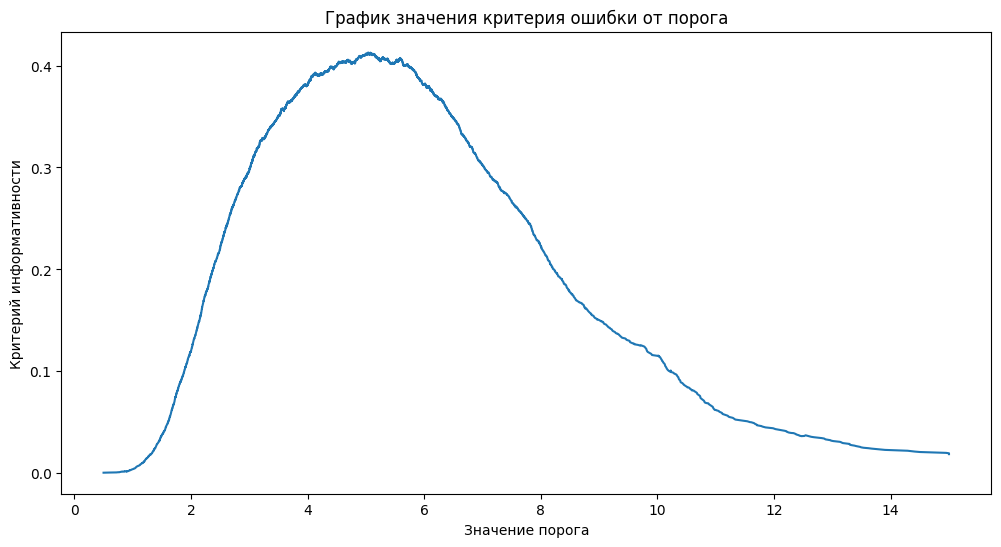

In [11]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————
med_thresholds, med_criterions, med_best_threshold, med_best_criterion = find_best_split(X['MedInc'], y, 'regression')
plt.figure(figsize=(12, 6))
plt.title('График значения критерия ошибки от порога')
plt.ylabel('Критерий информативности')
plt.xlabel('Значение порога')
plt.plot(med_thresholds, med_criterions)
display(f'Лучшее значение порога: {med_best_threshold} со значением критерия {med_best_criterion}')

Найдите лучший, с вашей точки зрения, предикат первой вершины решающего дерева.

In [12]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————
thresholds, criteria = [], []
for col in X.values.T:
    _, _, best_threshold, best_criterion = find_best_split(col, y, 'regression')
    thresholds.append(best_threshold)
    criteria.append(best_criterion)
best_idx = np.argmax(criteria)
display(f'Лучший предикат на первом пункте: {X.columns[best_idx]} > {thresholds[best_idx]}')
display(f'Это позволяет достичь значения критерия в {criteria[best_idx]}')

'Лучший предикат на первом пункте: MedInc > 5.03515'

'Это позволяет достичь значения критерия в 0.41275138620195617'

**Задание 2.2 (1 балл)** Разберитесь с написанным кодом решающего дерева, заполните пропуски в коде и реализуйте недостающий метод `_predict_node()`.

Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции в разделе «Построение дерева».
- **Выбор лучшего разбиения** необходимо производить по критерию Джини.
- **Критерий останова:** все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку.
- **Ответ в листе:** наиболее часто встречающийся класс в листе.

В задаче также предлагается получить два бонуса, по баллу на каждый!

- **Реализуйте способ обрабатывать пропуски в даннх и реализуйте его, пояснив свои действия.**
- **Реализуйте метод оценки важности признаков.**

In [13]:
class DecisionTree:

    def __init__(
        self,
        feature_types: Union[List[str], np.ndarray],
        max_depth: int = None,
        min_samples_split: int = None,
        min_samples_leaf: int = None,
        task: str = "classification"
    ) -> None:

        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        # В этой переменной будем хранить узлы решающего дерева. Каждая вершина хранит в себе идентификатор того,
        # является ли она листовой. Листовые вершины хранят значение класса для предсказания, нелистовые - правого и
        # левого детей (поддеревья для продолжения процедуры предсказания)
        self._tree = {}

        # типы признаков (категориальные или числовые)
        self._feature_types = feature_types

        # гиперпараметры дерева
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf
        if max_depth == min_samples_split == min_samples_leaf == None:
            self._min_samples_leaf = 1
        self.task = task

        # Переменная, если вы решите делать бонус
        self._feature_importances = {}


    def _fit_node(
        self,
        sub_X: np.ndarray,
        sub_y: np.ndarray,
        node: dict,
        depth: int = 0
    ) -> None:

        # критерий останова
        # Проверяем критерии остановки
        stop = False

        # Все элементы одного класса
        if np.all(sub_y == sub_y[0]):
            stop = True

        # Достигнута максимальная глубина
        if self._max_depth is not None and depth >= self._max_depth:
            stop = True

        # Недостаточно samples для разделения
        if self._min_samples_split is not None and len(sub_y) < self._min_samples_split:
            stop = True

        if stop:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]

            # подготавливаем признак для поиска оптимального порога
            feature_vector = sub_X[:, feature]

            # ищем оптимальный порог
            _, _, threshold, gini = find_best_split(feature_vector, sub_y, self.task, feature_type)

            if threshold is None:
                continue

            # выбираем сплит с минимальной нечистотой
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                threshold_best = threshold

                # split - маска на объекты, которые должны попасть в левое поддерево
                if feature_type == "real":
                    split = feature_vector <= threshold_best  # левое поддерево: значения <= порога
                elif feature_type == "categorical":
                    # в данной реализации это просто значение категории
                    split = feature_vector == threshold_best
                else:
                    raise ValueError

        # записываем полученные сплиты в атрибуты класса
        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        if (self._min_samples_leaf is not None and
                (np.sum(split) < self._min_samples_leaf or
                 np.sum(~split) < self._min_samples_leaf)):
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["category_split"] = threshold_best
        else:
            raise ValueError

        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"], depth+1)
        self._fit_node(sub_X[~split], sub_y[~split], node["right_child"], depth+1)

    def _predict_node(self, x: np.ndarray, node: dict) -> int:
        """
        Предсказание начинается с корневой вершины дерева и рекурсивно идёт в левое или правое поддерево в зависимости от значения
        предиката на объекте. Листовая вершина возвращает предсказание.
        :param x: np.array, элемент выборки
        :param node: dict, вершина дерева
        """
        if node["type"] == "terminal":
            return node["class"]

        feature = node["feature_split"]
        feature_type = self._feature_types[feature]

        if feature_type == "real":
            if x[feature] <= node["threshold"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        elif feature_type == "categorical":
            if x[feature] == node["category_split"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        else:
            raise ValueError("Unknown feature type")

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        self._fit_node(X, y, self._tree)

    def predict(self, X: np.ndarray) -> np.ndarray:
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))

        return np.array(predicted)

**Задание 2.3 (1 балл)** Загрузите таблицу `students.csv` (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте диаграммы рассеяния "значение признака — класс" для всех пяти признаков.

In [14]:
students = pd.read_csv('students.csv', index_col=0) # ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————
y = students['UNS']
students = students.drop('UNS', axis=1)
students.head(3)

,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.06,0.06,0.05,0.25,0.33


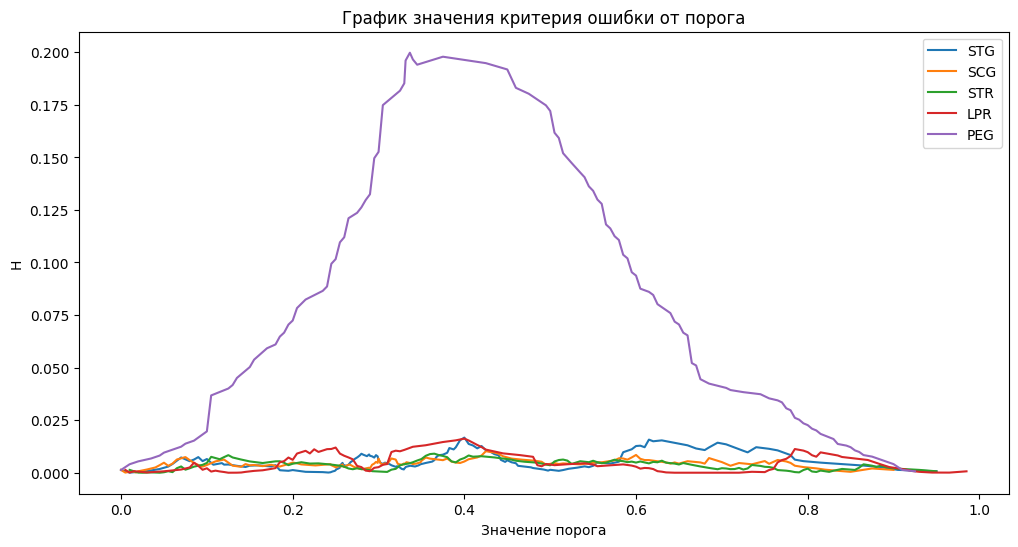

In [15]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————
plt.figure(figsize=(12, 6))
plt.title('График значения критерия ошибки от порога')
plt.ylabel('H')
plt.xlabel('Значение порога')
for i, features in enumerate(students.values.T):
    thresholds, criteria, best_threshold, best_criterion = find_best_split(features, y, 'classification')
    plt.plot(thresholds, criteria, label=students.columns[i])
plt.legend()

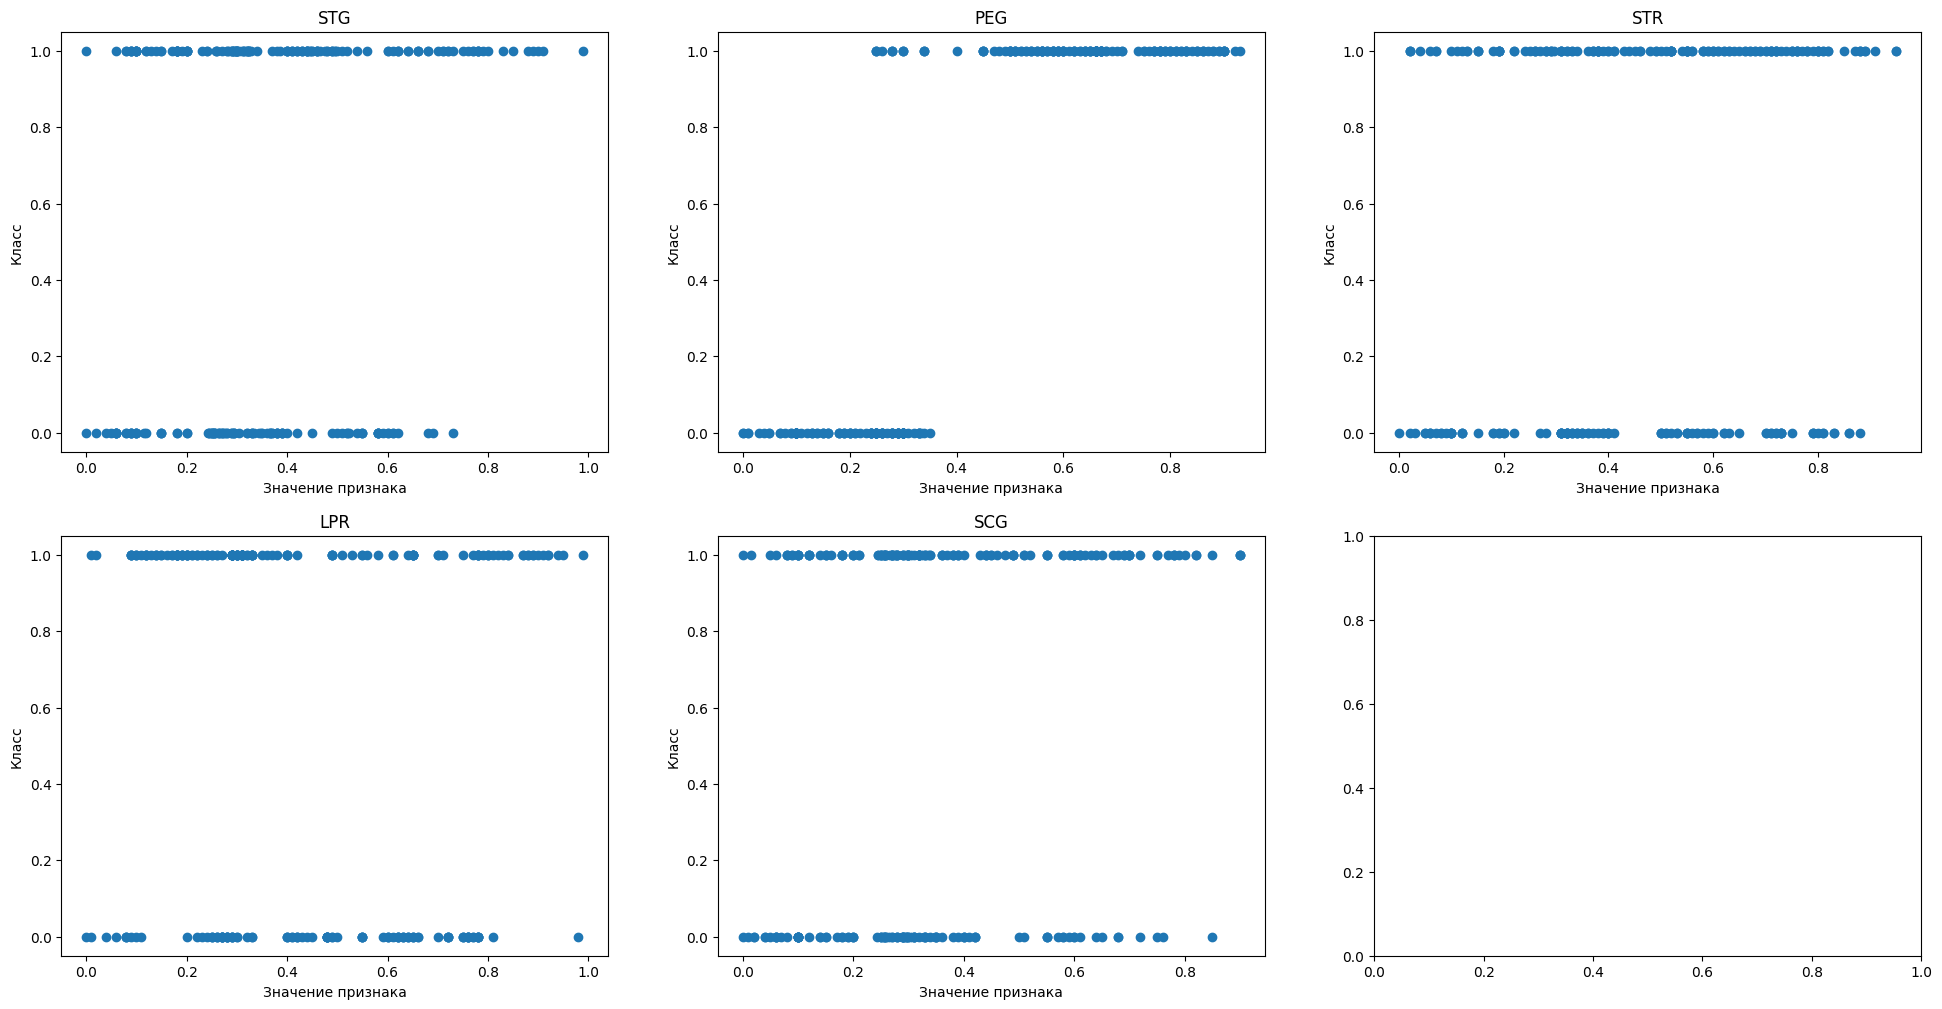

In [16]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————
fig, ax = plt.subplots(2, 3)
fig.set_figwidth(24)
fig.set_figheight(12)
for i, features in enumerate(students.values.T):
    axis = ax[i%2][i%3]
    axis.set_ylabel('Класс')
    axis.set_xlabel('Значение признака')
    axis.title.set_text(students.columns[i])
    axis.scatter(features, y)

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой диаграмм рассеяиния? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** PEG однозначно можно разделить одной прямой на графике рассеяния (с хорошей степенью точности).

Такой же результат следует из графика критериев информативности, где PEG однозначно всюду выше других признаков. Получается, по аналогии с ROC-AUC, площадь под графиком критерия информативности показывает, насколько хорошо признак подходит для разделения по нему. Соответственно, под плохими признаками площадь маленькая (небольшая оговорка - под площадью "под" графиком мы понимаем площадь не между осью Х и графиком, а между неким минимальным значением и графиком, в данном случае таким значением можно взять -0.5)

**Задание 2.4 (1 балл)** Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). 

1. Скачайте таблицу `agaricus-lepiota.data` (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), 
2. Считайте таблицу при помощи `pandas`,
3. Примените к каждому столбцу `LabelEncoder` (из `sklearn`), чтобы преобразовать строковые имена категорий в натуральные числа. 

Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

In [17]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————
mushroom = pd.read_csv('agaricus-lepiota.data')
y = mushroom.iloc[:, 0]
mushroom.drop(mushroom.columns[0], axis=1, inplace=True)
mushroom.head(3)

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
1,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
2,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

train, test, train_y, test_y = train_test_split(mushroom, y, test_size=0.5, random_state=17, stratify=y)
y_encoder = LabelEncoder()
train_y = y_encoder.fit_transform(train_y)
test_y = y_encoder.transform(test_y)

for column in train.columns:
    le = LabelEncoder()
    train[column] = le.fit_transform(train[column])
    test[column] = test[column].map(
        lambda x: le.transform([x])[0] if x in le.classes_ else -1
    )

train_arr = train.values
test_arr = test.values

In [19]:
train.values

array([[2, 3, 2, ..., 3, 4, 0],
       [0, 2, 4, ..., 4, 4, 2],
       [2, 0, 2, ..., 2, 5, 0],
       ...,
       [5, 0, 3, ..., 3, 0, 1],
       [2, 2, 4, ..., 8, 4, 2],
       [3, 3, 9, ..., 7, 4, 0]])

In [20]:
ds = DecisionTree(feature_types=['categorical']*train.shape[1])
ds.fit(train_arr, train_y)
display(accuracy_score(train_y, ds.predict(train_arr)))
accuracy_score(test_y, ds.predict(test_arr))

1.0

0.9992614475627769

Качество получили шикарнейшее, как же мы хороши

## Часть 3: Бэггинг и случайный лес (4 балла)

В данной части мы будем работать [с задачей предсказания диабета у пациента](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data). Посмотрим на работу бэггинга над решающими деревьями и случайного леса, сравним их работу.

In [21]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [22]:
data = pd.read_csv('diabetes.csv')
print(f"Dataset shape: {data.shape}")
data.head()

Dataset shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Посмотрим на распределение целевой переменной

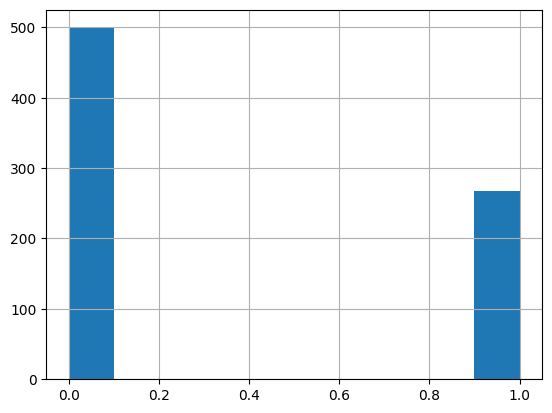

In [23]:
data['Outcome'].hist()
plt.show()

**Задание 3.1 (0.5 балла)** Разделите данные на признаки и целевую переменную. Разбейте датасет на обучающую и тестовую части в отношении 7:3. Затем разделите обучающую выборку на обучающую-обучающую и обучающую-валидационную в соотношении 7:3 (то есть в итоге должно получиться три выборки: обучающая-обучающая (0.49 от исходного датасета), обучающая-валидационная (0.21 от исходного датасета) и тестовая (0.3 от исходного датасета).

In [24]:
y = data['Outcome']
data.drop('Outcome', axis=1, inplace=True)

In [25]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————
train, test, train_y, test_y = train_test_split(data, y, test_size=0.3, random_state=17, stratify=y)
train_tr, val, train_tr_y, val_y = train_test_split(train, train_y, test_size=0.3, random_state=17, stratify=train_y)

**Задание 3.2 (1 балл)** На обучающей-валидационной выборке подберите оптимальные значения гиперпараметров `max_depth` и `min_samples_leaf` для `DecisionTreeClassifier`. Для этого:
1. Создайте списки с возможными значениями для перебора.
2. Для каждой пары значений обучите дерево на обучающей-обучающей выборке и определите качество на обучающей-валидационной выборке. В качестве критерия будем использовать `f1-меру`.
3. Выберите ту пару значений, которая даёт наилучшее качество на обучающей-валидационной выборке. 


Обучите решающее дерево с подобранными гиперпараметрами на **полной обучающей** выборке. Оцените качество классификации на тестовой выборке по метрикам `accuracy`, `precision` и `recall`, `auc_roc`.

In [26]:
max_depths = min_samples_leafs = [*range(1, 50)]

results = []
for max_depth in max_depths:
    for min_samples_leaf in min_samples_leafs:
        tr = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=17)
        tr.fit(train_tr, train_tr_y)
        f1 = f1_score(val_y, tr.predict(val))
        results.append({
            'max_depth': max_depth,
            'min_samples_leaf': min_samples_leaf,
            'f1_score': f1
        })

res = pd.DataFrame(results)
res.sort_values(by=['f1_score'], ascending=False, inplace=True)
res.head(5)

,max_depth,min_samples_leaf,f1_score
307,7,14,0.607843
394,9,3,0.601770
2365,49,14,0.600000
1385,29,14,0.600000
1434,30,14,0.600000


Лучший результат - глубина 7 при минимальном количестве объектов в листе 14. Вполне нормальный ответ

In [27]:
def build_res_df(method_name: str, true_y: np.array, predictions: np.array,df: pd.DataFrame = None):
    if df is None:
        df = pd.DataFrame(columns = ['type', 'accuracy', 'precision', 'recall', 'auc_roc'])
        df.set_index('type', inplace=True)

    df.loc[method_name] = [
        accuracy_score(true_y, predictions),
        precision_score(true_y, predictions),
        recall_score(true_y, predictions),
        roc_auc_score(true_y, predictions)
    ]

    return df

In [28]:
tr = DecisionTreeClassifier(max_depth=7, min_samples_leaf=14, random_state=17)
tr.fit(train_tr, train_tr_y)
results = tr.predict(test)
tree_res = build_res_df('DecisionTreeClassifier', test_y, results)
tree_res

,accuracy,precision,recall,auc_roc
type,,,,
DecisionTreeClassifier,0.766234,0.68,0.62963,0.734815


**Задание 3.3 (0.5 балла)** Обучите [`BaggingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) на 50 деревьях на **полной обучающей** выборке. Оцените качество классификации на тестовой выборке по тем же метрикам.

In [29]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————
bagger = BaggingClassifier(n_estimators=50, random_state=17)
bagger.fit(train, train_y)
preds = bagger.predict(test)
build_res_df('BaggingClassifier', test_y, preds, tree_res)

,accuracy,precision,recall,auc_roc
type,,,,
DecisionTreeClassifier,0.766234,0.680000,0.629630,0.734815
BaggingClassifier,0.774892,0.679012,0.679012,0.752840


**Задание 3.4 (1 балл)** Выполните кросс-валидацию на полной обучающей выборке и подберите оптимальные значения гиперпараметров `max_depth` и `min_samples_split` для `Random Forest` с 50 деревьями. Для этого:

1. Создайте списки с возможными значениями для перебора.
2. Для каждой пары значений проведите кросс-валидацию на полной обучающей выборке. Количество разбиений выберите на ваш вкус. В качестве критерия будем использовать `f1-меру`. Усредните значение критерия по всем прогонам кросс-валидации. 
3. Выберите ту пару значений, которая даёт наилучшее среднее качество. 

Обучите случайный лес с подобранными гиперпараметрами на **полной обучающей** выборке. Оцените качество классификации по тем же метрикам. Какая из трёх построенных моделей показала себя лучше?

In [30]:
train.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
356,1,125,50,40,167,33.3,0.962,28
544,1,88,78,29,76,32.0,0.365,29
148,5,147,78,0,0,33.7,0.218,65


In [31]:
# Ренж из 50 отрабатывал 50 тысяч лет
max_depths = min_samples_splits = [2**n for n in range(1, 9)]
t = 5
step = train.shape[0] // t
train_val = train.values
train_y_val = train_y.values

cv_results = []
for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        tr = RandomForestClassifier(max_depth=max_depth, min_samples_split=min_samples_split, n_estimators=50, random_state=17)
        res = []
        for i in range(0, train.shape[0]-step, step):
            train_cv = np.concatenate([train_val[:i], train_val[i + step:]])
            train_y_cv = np.concatenate([train_y_val[:i], train_y_val[i + step:]])
            test_cv = train_val[i:i + step]
            test_y_cv = train_y_val[i:i + step]
            tr.fit(train_cv, train_y_cv)
            res.append(f1_score(test_y_cv, tr.predict(test_cv)))

        score = np.mean(res)
        cv_results.append({
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'mean_f1_score': score
        })

reses = pd.DataFrame(cv_results)
reses.sort_values(by=['mean_f1_score'], ascending=False, inplace=True)
reses.head(5)

,max_depth,min_samples_split,mean_f1_score
18,8,8,0.616635
28,16,32,0.606282
44,64,32,0.606282
36,32,32,0.606282
52,128,32,0.606282


**Задание 3.5 (0.5 балла)** Постройте график зависимости AUC ROC на тестовой выборке от числа деревьев (`n_estimators`) для случайного леса, обучаемого на **полной обучающей** выборке. Какие выводы можно сделать?

In [32]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————
max_depth = min_samples_split = 8
est_results = []
for i in range(1, 150):
    tr = RandomForestClassifier(max_depth=max_depth, min_samples_split=min_samples_split, n_estimators=i, random_state=17)
    tr.fit(train, train_y)
    est_results.append(roc_auc_score(test_y, tr.predict(test)))

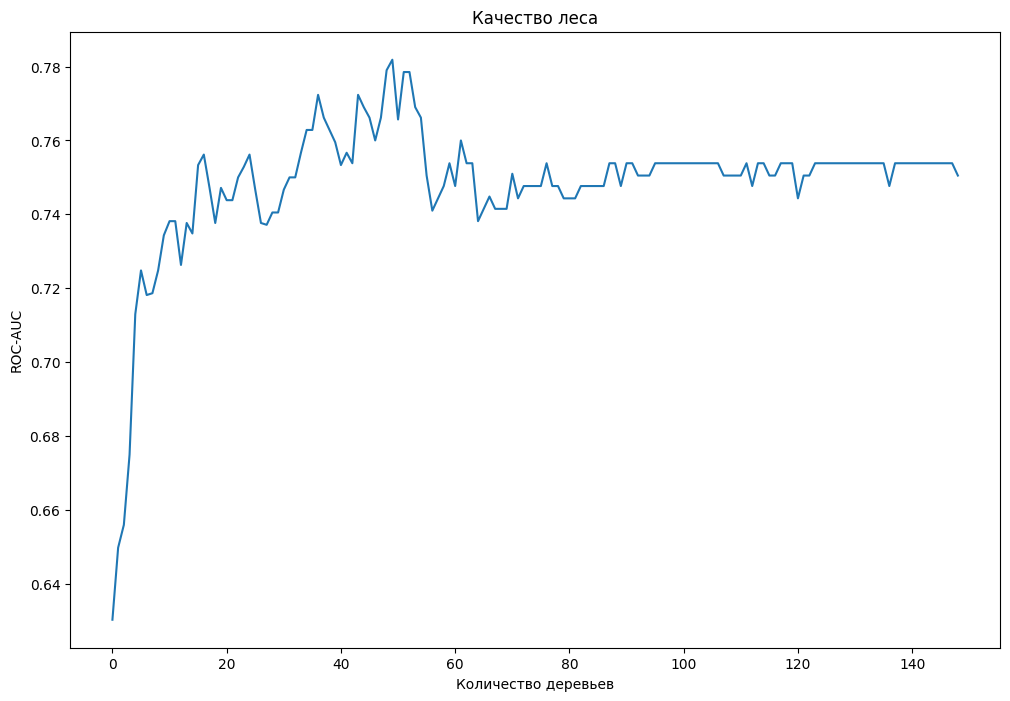

In [33]:
plt.figure(figsize=(12, 8))
plt.title('Качество леса')
plt.xlabel('Количество деревьев')
plt.ylabel('ROC-AUC')
plt.plot(est_results)

Картину получили любопытную

Лес переобучаться не должен, однако количество деревьев в штук 50 показывает лучшие значения

**Задание 3.6 (0.5 балла)** Для лучшей модели случайного леса из **Задания 3.4** посчитайте важность признаков и постройте bar plot. Какой признак оказался самым важным для определения диабета?

<BarContainer object of 8 artists>

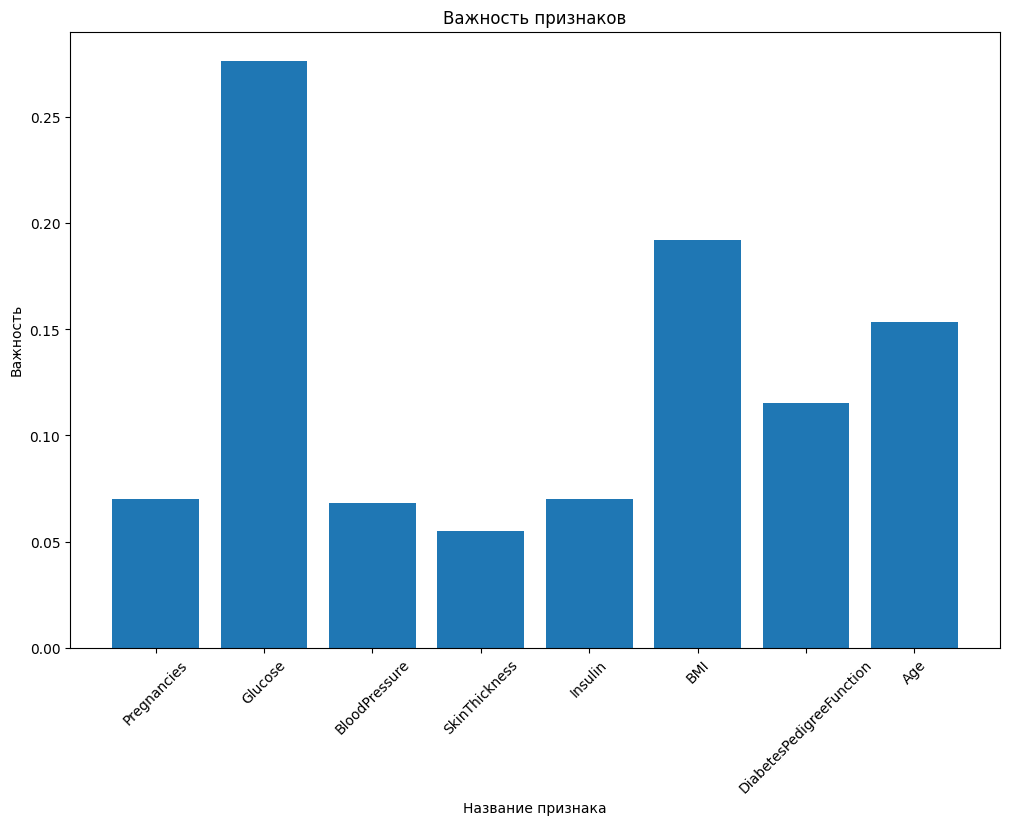

In [34]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————
bst_tree = RandomForestClassifier(max_depth=max_depth, min_samples_split=min_samples_split, n_estimators=50, random_state=17)
bst_tree.fit(train, train_y)

plt.figure(figsize=(12, 8))
plt.title('Важность признаков')
plt.xlabel('Название признака')
plt.ylabel('Важность')
plt.xticks(rotation=45)
plt.bar(train.columns, bst_tree.feature_importances_)

Уровень глюкозы оказался наиболее важным, за ним идут BMI и возраст. Здорово.